<a href="https://colab.research.google.com/github/AyushK0808/Component_Sevice_Predictor/blob/ayush/caterpillar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/caterpillar_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1000 non-null   int64  
 1   Time       1000 non-null   object 
 2   Machine    1000 non-null   object 
 3   Component  1000 non-null   object 
 4   Parameter  1000 non-null   object 
 5   Value      1000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


(   Id                  Time              Machine Component      Parameter  \
 0   1  2022-06-28T01:17:39Z  Articulated_Truck_1     Drive  Brake Control   
 1   1  2022-05-07T09:44:50Z              Dozer_1    Engine          Speed   
 2   1  2022-05-12T09:47:44Z  Articulated_Truck_1    Engine          Speed   
 3   1  2022-06-28T23:08:17Z              Dozer_1     Drive  Brake Control   
 4   1  2022-06-29T22:23:48Z          Excavator_1     Drive  Brake Control   
 
     Value  
 0     2.0  
 1  1580.0  
 2  1700.0  
 3     7.0  
 4     9.0  ,
 None)

In [ ]:
# Define the threshold mapping for each parameter
thresholds = {
    "Engine Speed": {"high": 1800, "probability": "Medium"},
    "Engine Temperature": {"high": 105, "probability": "High"},
    "Engine Oil Pressure": {"low": 25, "high": 65, "probability": "High"},
    "Brake Control": {"low": 1, "probability": "Medium"},
    "Transmission Pressure": {"low": 200, "high": 450, "probability": "Medium"},
    "Pedal Sensor": {"high": 4.7, "probability": "Low"},
    "Water Fuel": {"high": 1800, "probability": "High"},
    "Fuel Level": {"low": 1, "probability": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "probability": "Low"},
    "Fuel Temperature": {"high": 400, "probability": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "probability": "High"},
    "Exhaust Gas Temperature": {"high": 365, "probability": "High"},
    "Hydraulic Pump Rate": {"high": 125, "probability": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "probability": "Medium"}
}

# Function to determine probability of failure based on thresholds
def determine_failure_probability(row):
    param = row["Parameter"]
    value = row["Value"]

    if param in thresholds:
        threshold = thresholds[param]
        if "low" in threshold and value < threshold["low"]:
            return threshold["probability"]
        elif "high" in threshold and value > threshold["high"]:
            return threshold["probability"]

    return "Low"  # Default if within the threshold range

# Apply the function to create a new column for failure probability
data["Failure Probability"] = data.apply(determine_failure_probability, axis=1)

# Display the first few rows with the new column
data.head()


,Id,Time,Machine,Component,Parameter,Value,Failure Probability
0,1,2022-06-28T01:17:39Z,Articulated_Truck_1,Drive,Brake Control,2.0,Low
1,1,2022-05-07T09:44:50Z,Dozer_1,Engine,Speed,1580.0,Low
2,1,2022-05-12T09:47:44Z,Articulated_Truck_1,Engine,Speed,1700.0,Low
3,1,2022-06-28T23:08:17Z,Dozer_1,Drive,Brake Control,7.0,Low
4,1,2022-06-29T22:23:48Z,Excavator_1,Drive,Brake Control,9.0,Low


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ["Machine", "Component", "Parameter", "Failure Probability"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = data.drop(columns=["Failure Probability", "Time", "Id"])
y = data["Failure Probability"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 4), (200, 4), (800,), (200,))

In [ ]:
print(X_train.head())
print(y_train.head())

     Machine  Component  Parameter   Value
29         2          3          2   217.0
535        3          1          8  1310.0
695        2          3          3    76.0
557        1          1          5    61.0
836        1          1          5    59.0
29     1
535    1
695    1
557    1
836    1
Name: Failure Probability, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=label_encoders["Failure Probability"].classes_)
report

print(X_test, y_pred)


     Machine  Component  Parameter    Value
521        0          3          3   119.00
737        1          2         10   279.00
740        3          1          8  1724.00
660        4          3          2   195.00
411        0          0         11   250.00
..       ...        ...        ...      ...
408        0          1          8  1640.00
332        3          3          9    15.26
208        4          3          3   105.00
613        2          1          5    65.00
78         1          1         10    98.00

[200 rows x 4 columns] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


     Id      Time              Machine Component                Parameter  \
0    48  08:09:29          Excavator_1    Engine              Temparature   
1     5  02:05:42  Articulated_Truck_1      Fuel            Water in Fuel   
2    24  06:25:04  Articulated_Truck_1    Engine              Temparature   
3    23  20:36:47     Backhoe_Loader_1     Drive    Transmission Pressure   
4    42  04:06:30          Excavator_1    Engine             Oil Pressure   
..   ..       ...                  ...       ...                      ...   
995  18  16:29:54      Asphalt_Paver_1      Misc  Exhaust Gas Temparature   
996  43  16:52:23      Asphalt_Paver_1      Fuel                    Level   
997  28  20:00:46      Asphalt_Paver_1      Misc      Air Filter Pressure   
998   4  14:09:21      Asphalt_Paver_1      Misc      Air Filter Pressure   
999  14  14:47:40      Asphalt_Paver_1      Misc  Exhaust Gas Temparature   

     Value        Date  
0    104.0  2022-06-03  
1     70.0  2022-05-12  


<ipython-input-5-10712d8aa3c6>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2028 - val_loss: 0.0822
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0890 - val_loss: 0.0752
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0741 - val_loss: 0.0706
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0670 - val_loss: 0.0704
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0590 - val_loss: 0.0645
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0521 - val_loss: 0.0643
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0492 - val_loss: 0.0592
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0463 - val_loss: 0.0639
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - val_loss: 0.0575
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - val_loss: 0.0581
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - val_loss: 0.0594
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss:

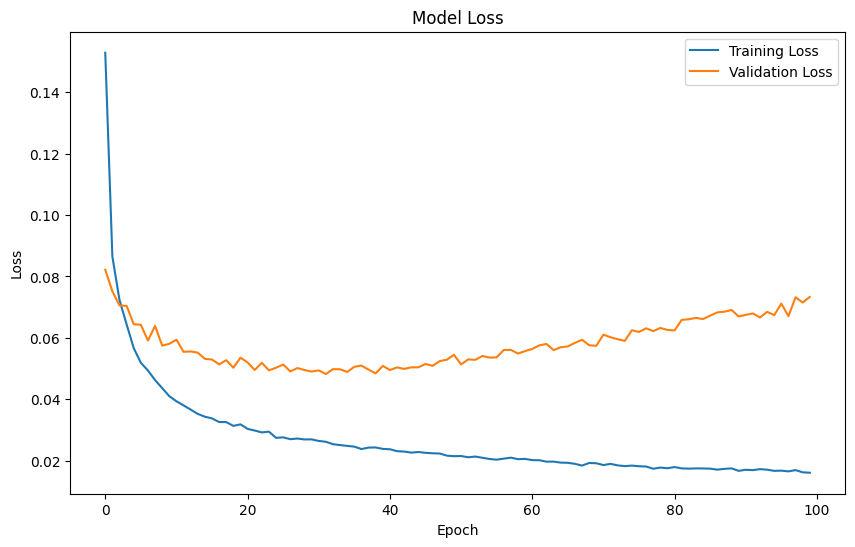

Scaled Data Statistics:
                Id        Value
count  1000.000000  1000.000000
mean      0.500000     0.146051
std       0.294655     0.252483
min       0.000000     0.000000
25%       0.244898     0.006643
50%       0.500000     0.032620
75%       0.755102     0.153075
max       1.000000     1.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf




def prepare_data(data, look_back=30):
    # Convert the 'Time' column to datetime format
    data['DateTime'] = pd.to_datetime(data['Time'])

    # Sort by 'DateTime'
    data = data.sort_values('DateTime')

    # Pivot the data
    pivot_data = data.pivot_table(index='DateTime', columns=['Component', 'Parameter'], values='Value', aggfunc='first')
    pivot_data.columns = [f'{col[0]}_{col[1]}' for col in pivot_data.columns]

    # Check for NaN values
    print("Columns with NaN values:", pivot_data.columns[pivot_data.isna().any()].tolist())
    print("NaN count before handling:", pivot_data.isna().sum().sum())

    # Fill NaN values
    pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')

    print("NaN count after handling:", pivot_data.isna().sum().sum())

    # Select relevant columns
    relevant_columns = ['Engine_Speed', 'Engine_Oil Pressure', 'Engine_Temparature',
                        'Drive_Brake Control', 'Drive_Transmission Pressure', 'Drive_Pedal Sensor',
                        'Fuel_Water in Fuel', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature',
                        'Misc_System Voltage', 'Misc_Exhaust Gas Temparature',
                        'Misc_Hydraulic Pump Rate', 'Misc_Air Filter Pressure']
    pivot_data = pivot_data[relevant_columns]

    # Handle any remaining NaN values
    if pivot_data.isna().sum().sum() > 0:
        print("Warning: There are still NaN values in the data.")
        print(pivot_data.isna().sum())
        pivot_data = pivot_data.dropna()

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(pivot_data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, pivot_data.columns


def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    d = []
    col1 = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))

    breakdown_occurred = False


    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if prediction[i] < low or prediction[i] >= high:
                    print(f"Potential breakdown on day {day+3} due to {col}: {prediction[i]}")
                    pred = prediction[i]
                    breakdown_occurred = True
                    return day, pred


def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model,test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, thresholds, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 10%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))
    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())


data = pd.read_excel('/content/caterpillar_data.xlsx')
import pandas as pd

# Sample data

# Create DataFrame
df = pd.DataFrame(data)

# Convert the 'timestamp' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Create 'date' and 'time' columns by extracting from 'timestamp'
df['Date'] = df['Time'].dt.date
df['Time'] = df['Time'].dt.time

# Drop the original 'timestamp' column if no longer needed
# df = df.drop(columns=['timestamp'])

print(df)

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model,test_predictions = train_and_evaluate_model(X, y)

#perform_cross_validation(X, y)
thresholds = { 'Engine_Oil Pressure': (25, 65),
    'Engine_Speed': (0, 1800),
    'Engine_Temparature': (0, 105),
    'Drive_Brake Control': (1, 9),
    'Drive_Pedal Sensor': (0, 4.7),
    'Fuel_Water in Fuel': (0, 1800),
    'Fuel_Level': (1, 10),
    'Fuel_Pressure': (35, 75),
    'Fuel_Temparature': (-1, 400),
    'Misc_System Voltage': (12, 15), #ed
    'Misc_Exhaust Gas Temparature': (0, 220), #ed
    'Misc_Hydraulic Pump Rate': (0, 125),
    'Misc_Air Filter Pressure': (15, 40)}

check_feature_scaling(data)
# Sensitivity analysis


# Define thresholds (as before)


# Predict breakdown
last_sequence = X[-1]

days_until_breakdown, failing_parameter = predict_breakdown(model, last_sequence, scaler, thresholds, column_names)




In [9]:
print(type(last_sequence))


<class 'numpy.ndarray'>


In [33]:
import pandas as pd
import numpy as np


# Create a list of timestamps
timestamps = pd.date_range(start='2022-05-01', end='2022-06-30', freq='H').strftime('%Y-%m-%dT%H:%M:%SZ').tolist()

# Create lists of machine components and parameters
machines = ['Excavator_1', 'Articulated_Truck_1', 'Backhoe_Loader_1', 'Dozer_1']
components = ['Engine', 'Drive', 'Fuel', 'Misc']
parameters = {
    'Engine': ['Speed', 'Oil Pressure', 'Temparature'],
    'Drive': ['Brake Control', 'Transmission Pressure', 'Pedal Sensor'],
    'Fuel': ['Water in Fuel', 'Level', 'Pressure', 'Temparature'],
    'Misc': ['System Voltage', 'Exhaust Gas Temparature', 'Hydraulic Pump Rate', 'Air Filter Pressure']
}

# Generate random data
data = {
    'Time': np.random.choice(timestamps, size=100),
    'Machine': np.random.choice(machines, size=100),
    'Component': [],
    'Parameter': [],
    'Value': np.random.uniform(low=0, high=250, size=100)
}

# Populate the 'Component' and 'Parameter' fields based on the randomly chosen machine
for _ in range(100):
    component = np.random.choice(components)
    parameter = np.random.choice(parameters[component])
    data['Component'].append(component)
    data['Parameter'].append(parameter)

# Convert to DataFrame
test_df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(test_df.head())


                   Time              Machine Component  \
0  2022-06-25T23:00:00Z          Excavator_1    Engine   
1  2022-05-14T02:00:00Z  Articulated_Truck_1      Misc   
2  2022-06-06T12:00:00Z              Dozer_1      Fuel   
3  2022-06-28T08:00:00Z              Dozer_1      Misc   
4  2022-06-24T16:00:00Z     Backhoe_Loader_1      Misc   

                 Parameter       Value  
0              Temparature  145.847949  
1  Exhaust Gas Temparature  100.212854  
2              Temparature  115.501451  
3  Exhaust Gas Temparature  236.820835  
4      Air Filter Pressure   38.337851  


In [34]:
Z1, y, scaler, column_names = prepare_data(test_df)

print("X shape:", Z1.shape)
print("y shape:", y.shape)


Columns with NaN values: ['Drive_Brake Control', 'Drive_Pedal Sensor', 'Drive_Transmission Pressure', 'Engine_Oil Pressure', 'Engine_Speed', 'Engine_Temparature', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature', 'Fuel_Water in Fuel', 'Misc_Air Filter Pressure', 'Misc_Exhaust Gas Temparature', 'Misc_Hydraulic Pump Rate', 'Misc_System Voltage']
NaN count before handling: 1244
NaN count after handling: 0
X shape: (66, 30, 14)
y shape: (66, 14)


<ipython-input-5-10712d8aa3c6>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')


In [35]:
last_sequence= Z1[-1]

days_until_breakdown, failing_parameter = predict_breakdown(model, last_sequence, scaler, thresholds, column_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

Columns with NaN values: ['Drive_Brake Control', 'Drive_Pedal Sensor', 'Drive_Transmission Pressure', 'Engine_Oil Pressure', 'Engine_Speed', 'Engine_Temparature', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature', 'Fuel_Water in Fuel', 'Misc_Air Filter Pressure', 'Misc_Exhaust Gas Temparature', 'Misc_Hydraulic Pump Rate', 'Misc_System Voltage']
NaN count before handling: 13000
NaN count after handling: 0
X shape: (970, 30, 14)
y shape: (970, 14)
NaN in X: False
NaN in y: False
Epoch 1/100


<ipython-input-36-51924f691489>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2027 - val_loss: 0.0861
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0834 - val_loss: 0.0818
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0715 - val_loss: 0.0785
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0638 - val_loss: 0.0768
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0592 - val_loss: 0.0741
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0540 - val_loss: 0.0711
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0510 - val_loss: 0.0709
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - val_loss: 0.0664
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - val_loss: 0.0647
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0436 - val_loss: 0.0618
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0411 - val_loss: 0.0610
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - val_l

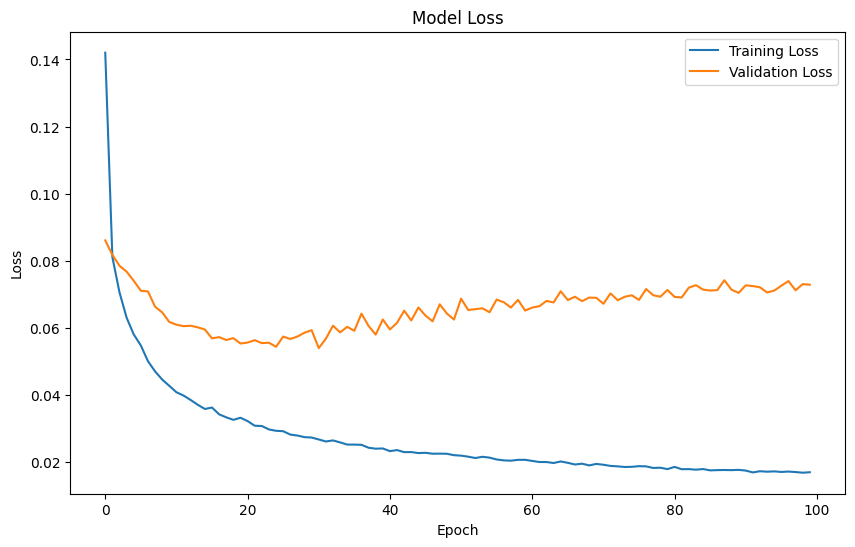

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.07830114662647247, 0.08759992569684982, 0.06340499222278595, 0.06783992052078247, 0.07354488968849182]
Mean CV score: 0.0741
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Feature sensitivities:
Misc_System Voltage: 0.0274
Engine_Oil Pressure: 0.0239
Misc_Hydraulic Pump Rate: 0.0230
Drive_Pedal Sensor: 0.0217
Fuel_Pressure: 0.0207
Drive_Transmission Pressure: 0.0174
Engine_Temparature: 0.0149
Drive_Brake Control: 0.0128
Fuel_Water in Fuel: 0.010

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare_data(data, look_back=30):
    # Convert the 'Time' column to datetime format
    data['DateTime'] = pd.to_datetime(data['Time'])

    # Sort by 'DateTime'
    data = data.sort_values('DateTime')

    # Pivot the data
    pivot_data = data.pivot_table(index='DateTime', columns=['Component', 'Parameter'], values='Value', aggfunc='first')
    pivot_data.columns = [f'{col[0]}_{col[1]}' for col in pivot_data.columns]

    # Check for NaN values
    print("Columns with NaN values:", pivot_data.columns[pivot_data.isna().any()].tolist())
    print("NaN count before handling:", pivot_data.isna().sum().sum())

    # Fill NaN values
    pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')

    print("NaN count after handling:", pivot_data.isna().sum().sum())

    # Select relevant columns
    relevant_columns = ['Engine_Speed', 'Engine_Oil Pressure', 'Engine_Temparature',
                        'Drive_Brake Control', 'Drive_Transmission Pressure', 'Drive_Pedal Sensor',
                        'Fuel_Water in Fuel', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature',
                        'Misc_System Voltage', 'Misc_Exhaust Gas Temparature',
                        'Misc_Hydraulic Pump Rate', 'Misc_Air Filter Pressure']
    pivot_data = pivot_data[relevant_columns]

    # Handle any remaining NaN values
    if pivot_data.isna().sum().sum() > 0:
        print("Warning: There are still NaN values in the data.")
        print(pivot_data.isna().sum())
        pivot_data = pivot_data.dropna()

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(pivot_data)

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, pivot_data.columns

def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, probabilities, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                prob_level = probabilities.get(col, "Medium")  # Default probability level is Medium
                prob_value = {"Low": 1, "Medium": 2, "High": 3}.get(prob_level, 2)

                # Factor in the probability level
                if (prediction[i] < low or prediction[i] >= high) and prob_value > 1:
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]} with probability {prob_level}")
                    return day + 1, col, prediction[i], prob_level

    print("No breakdown predicted in the next 30 days.")
    return None, None, None, None

def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model,test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, thresholds, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 10%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))
    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

# Load data (replace with your data loading method)
data = pd.read_excel('/content/caterpillar_data.xlsx')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model, test_predictions = train_and_evaluate_model(X, y)

thresholds = {
    'Engine_Oil Pressure': (25, 65),
    'Engine_Speed': (0, 1800),
    'Engine_Temparature': (0, 105),
    'Drive_Brake Control': (1, 9),
    'Drive_Pedal Sensor': (0, 4.7),
    'Fuel_Water in Fuel': (0, 1800),
    'Fuel_Level': (1, 10),
    'Fuel_Pressure': (35, 75),
    'Fuel_Temparature': (-1, 400),
    'Misc_System Voltage': (12, 15),
    'Misc_Exhaust Gas Temparature': (0, 220),
    'Misc_Hydraulic Pump Rate': (0, 125),
    'Misc_Air Filter Pressure': (15, 40)
}

probabilities = {
    'Engine_Oil Pressure': 'High',
    'Engine_Speed': 'Medium',
    'Engine_Temparature': 'High',
    'Drive_Brake Control': 'Medium',
    'Drive_Pedal Sensor': 'Low',
    'Fuel_Water in Fuel': 'High',
    'Fuel_Level': 'Low',
    'Fuel_Pressure': 'Low',
    'Fuel_Temparature': 'High',
    'Misc_System Voltage': 'High',
    'Misc_Exhaust Gas Temparature': 'High',
    'Misc_Hydraulic Pump Rate': 'Medium',
    'Misc_Air Filter Pressure': 'Medium'
}

last_sequence = X[-1]  # The last sequence used for predicting future breakdowns

days_until_breakdown, failing_parameter, prediction_value, probability_level = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names, probabilities
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}, Probability: {probability_level}.")
else:
    print("No breakdown predicted in the next 30 days.")

# Perform cross-validation
perform_cross_validation(X, y)

# Sensitivity analysis
sensitivity_analysis(model, X, scaler, thresholds, column_names)

# Feature scaling check
check_feature_scaling(data)
